In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import logging
import numpy as np
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [3]:
from qrl_navigation.model import QNetwork
from qrl_navigation.replay_buffer import ReplayBuffer
from qrl_navigation.agent import Agent
from qrl_navigation.environment import BananaMazeEnv
from qrl_navigation.training import dqn_training

In [4]:
maze_env = BananaMazeEnv(train_mode=True)
agent = Agent(maze_env.state_size, maze_env.action_size)

DEBUG:unityagents:The true file name is Banana
DEBUG:unityagents:This is the launch string /home/adam/code/qrl_navigation/notebooks/../bin/unity_banana_maze/Banana.x86_64
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
meta = dqn_training(agent, maze_env, '../experiments/basic', n_episodes=20, logger=logger)

INFO:root:Current eps is 0.995
Episode 1	Average Score: 0.0
INFO:root:Current eps is 0.990025
Episode 2	Average Score: 0.0
INFO:root:Current eps is 0.985074875
Episode 3	Average Score: -0.3333333333333333
INFO:root:Current eps is 0.9801495006250001
Episode 4	Average Score: -0.75
INFO:root:Current eps is 0.9752487531218751
Episode 5	Average Score: -1.0
INFO:root:Current eps is 0.9703725093562657
Episode 6	Average Score: -0.8333333333333334
INFO:root:Current eps is 0.9655206468094844
Episode 7	Average Score: -0.7142857142857143
INFO:root:Current eps is 0.960693043575437
Episode 8	Average Score: -0.75
INFO:root:Current eps is 0.9558895783575597
Episode 9	Average Score: -0.6666666666666666
INFO:root:Current eps is 0.9511101304657719
Episode 10	Average Score: -0.4
INFO:root:Current eps is 0.946354579813443
Episode 11	Average Score: -0.36363636363636365
INFO:root:Current eps is 0.9416228069143757
Episode 12	Average Score: -0.3333333333333333
INFO:root:Current eps is 0.9369146928798039
Episod

In [8]:
meta

{'agent': 'Agent(state_size=37, action_size=4, fc_units=[64, 64], device="cpu", dueling=True)',
 'eps': [0.995,
  0.990025,
  0.985074875,
  0.9801495006250001,
  0.9752487531218751,
  0.9703725093562657,
  0.9655206468094844,
  0.960693043575437,
  0.9558895783575597,
  0.9511101304657719,
  0.946354579813443,
  0.9416228069143757,
  0.9369146928798039,
  0.9322301194154049,
  0.9275689688183278,
  0.9229311239742362,
  0.918316468354365,
  0.9137248860125932,
  0.9091562615825302,
  0.9046104802746175],
 'meta_path': '../experiments/basic/meta.pickle',
 'model_path': '../experiments/basic/model.pt',
 'scores': [0.0,
  0.0,
  -1.0,
  -2.0,
  -2.0,
  0.0,
  0.0,
  -1.0,
  0.0,
  2.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  0.0]}

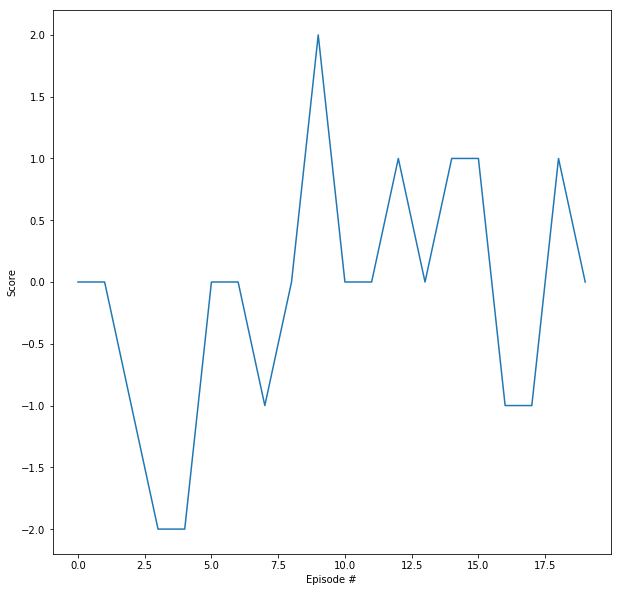

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.plot(np.arange(len(meta['scores'])), meta['scores'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
maze_env.close()